In [1]:
from imputationLibrary import decompose, forwardFilling, hotDeck, meanImputation, movingAverage, splineInterpolation, randomSampleImputation, nature
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from sklearn import preprocessing
from datetime import datetime, timedelta

In [2]:
INPUT = 'output/\CompleteWeeklyIndexes'

In [3]:
df = pd.read_csv(INPUT+'.csv', parse_dates=True, index_col=0)
df_test = df.loc['2015-01-02':] #Selecting test data
df_train = df.loc['2000-01-01':'2015-01-01'] #Selecting training data
df_filled = df_train.fillna(0)
df_filled_test = df_test.fillna(0)

In [4]:
df_decomposed_resid = pd.DataFrame()
df_decomposed_trend = pd.DataFrame()
df_decomposed_seasonal = pd.DataFrame()

df_decomposed_resid_test = pd.DataFrame()
df_decomposed_trend_test = pd.DataFrame()
df_decomposed_seasonal_test = pd.DataFrame()

df_nan = df_train.isna()
df_nan_test = df_test.isna()

In [5]:
def plot_ac(df, name):
    df = df.astype(float)
    #scaled = preprocessing.StandardScaler().fit_transform([np.array(df.fillna(0))])
    normalized = preprocessing.normalize(np.array([np.array(df.fillna(0))]))
    corr = signal.correlate(normalized, normalized, mode='full')
    plt.plot(corr[0], 'o-', markersize=2)
    plt.axhline(2/np.sqrt(len(df)), ls=':')
    plt.axhline(-2/np.sqrt(len(df)), ls=':')
    plt.title(name + ' auto-correlation')
    plt.show()

In [6]:
def decompose_and_plot(ts, flag_plot = False):
    ts_decomposed = decompose.decompose(ts)
    if flag_plot:
        ts_decomposed.plot()
        plt.show()
        print("Resid is white noise? ", nature.isWhiteNoise(ts_decomposed.resid))
        print("Resid is seasonal noise? ", nature.isSeasonal(ts_decomposed.resid))
        print("Resid is trended noise? ", nature.isTrended(ts_decomposed.resid))
        print("Resid is seasonal and trended noise? ", nature.isTrendedAndSeasonal(ts_decomposed.resid))
        plot_ac(ts_decomposed.resid, "Resid")
        plot_ac(ts_decomposed.trend, "Trend")
        plot_ac(ts_decomposed.seasonal, "Seasonal")
    return ts_decomposed.resid, ts_decomposed.trend, ts_decomposed.seasonal
    

In [7]:
# Subsample para weekly

# Generating weekly sampled dataset
def generate_weekly(df, initial_friday):
    df_friday = initial_friday #datetime(2000,1,7)

    df_weekly = pd.DataFrame(columns = df.columns)
    
    while df_friday <= df.tail(1).index:
        df_weekly = df_weekly.append(df.loc[df_friday])
        df_friday+=timedelta(days=7)
    return df_weekly

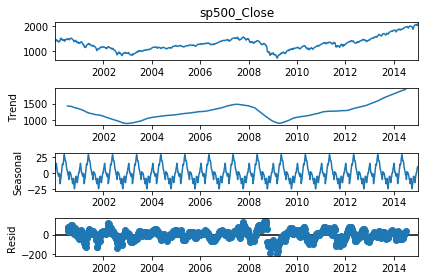

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


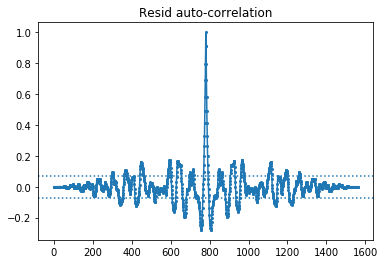

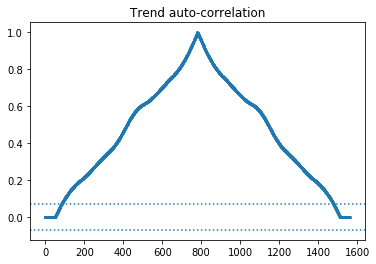

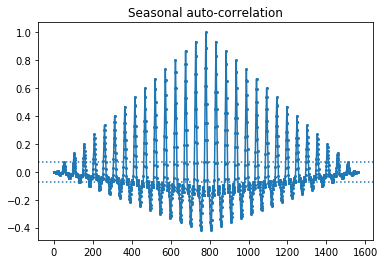

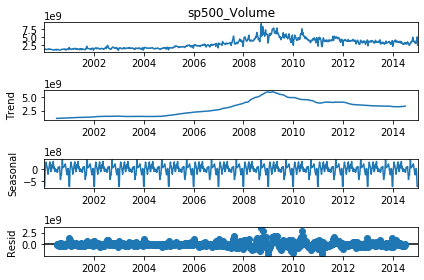

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


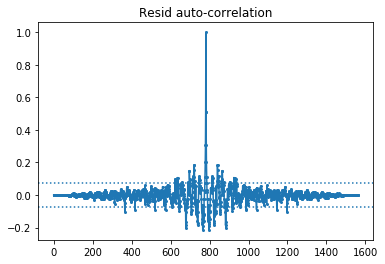

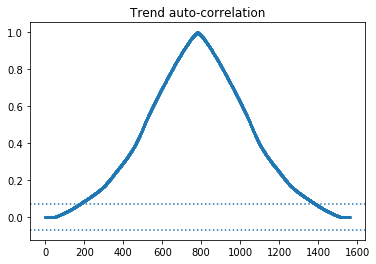

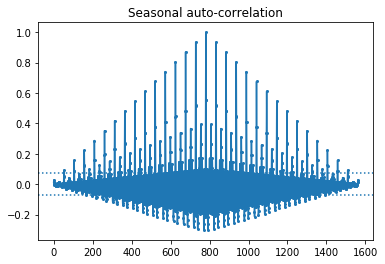

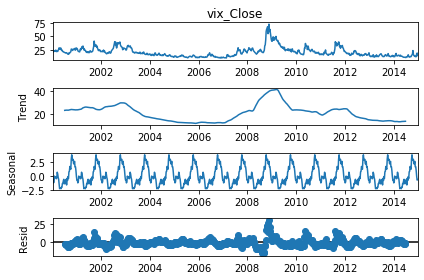

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


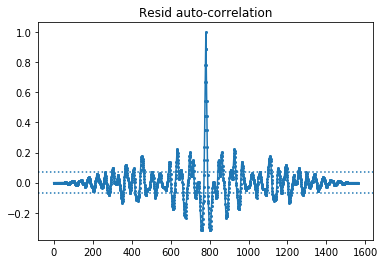

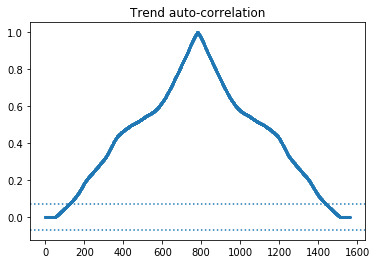

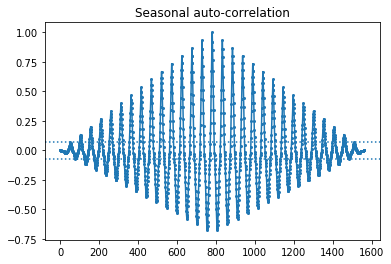

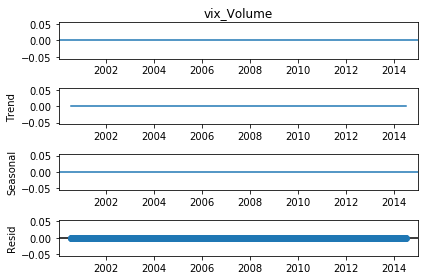

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


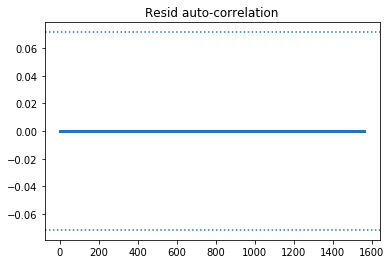

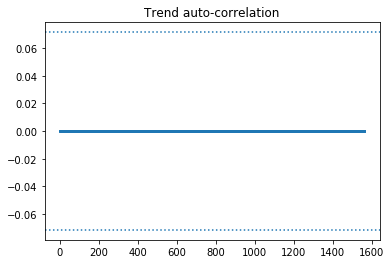

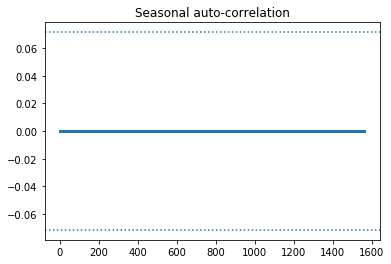

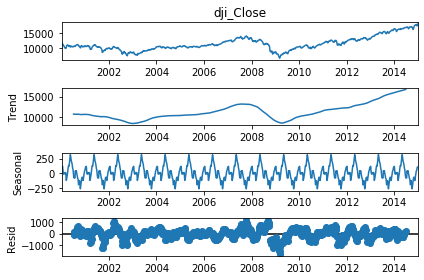

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


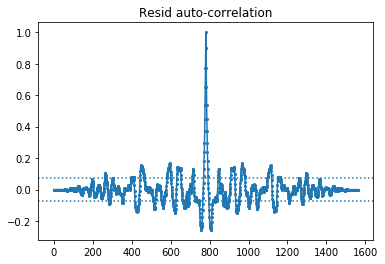

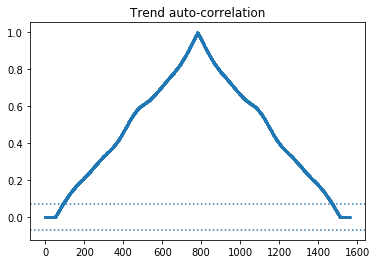

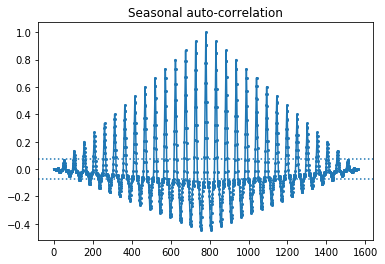

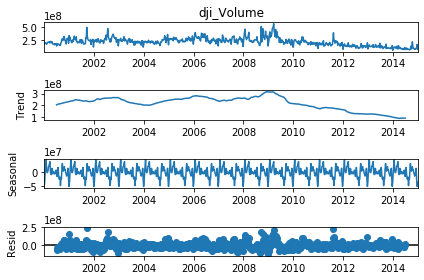

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


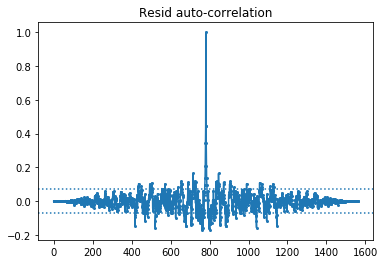

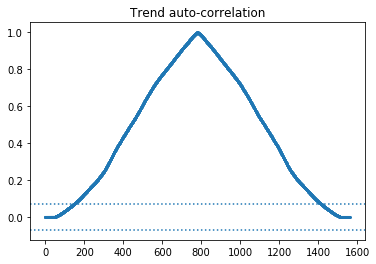

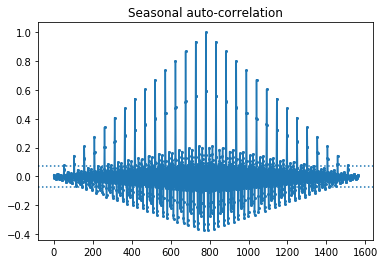

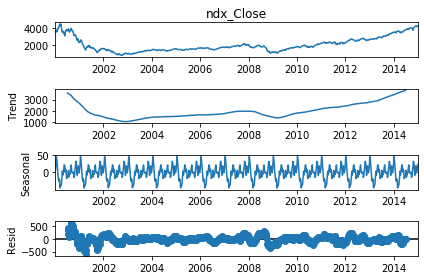

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


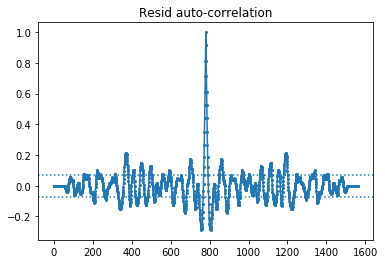

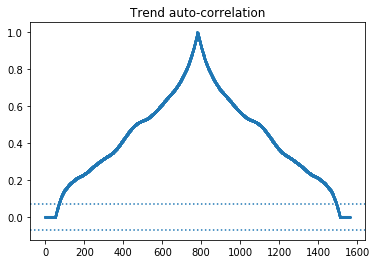

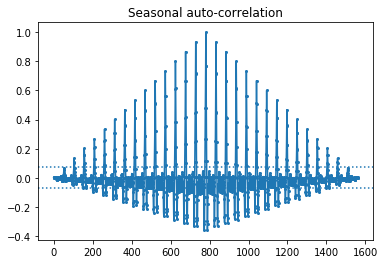

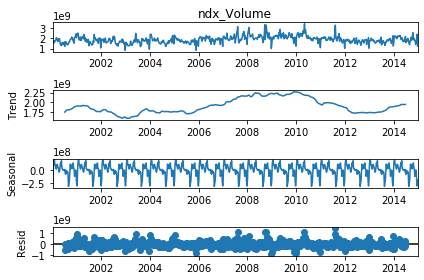

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


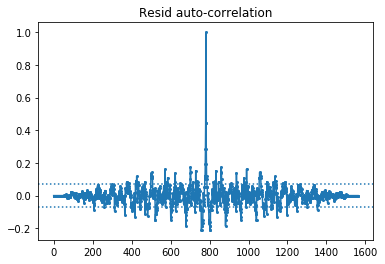

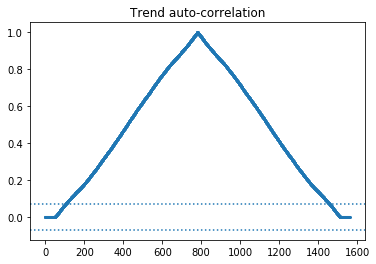

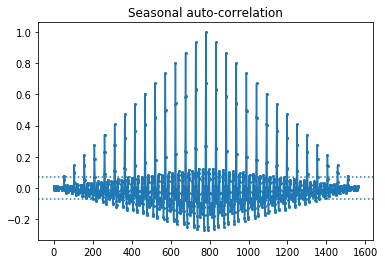

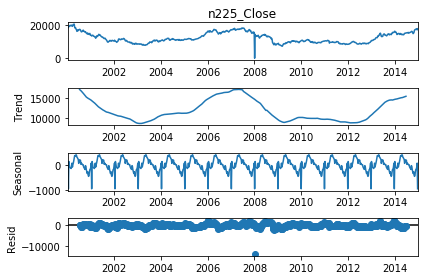

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


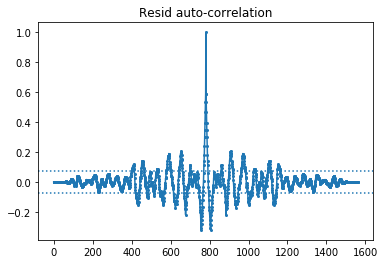

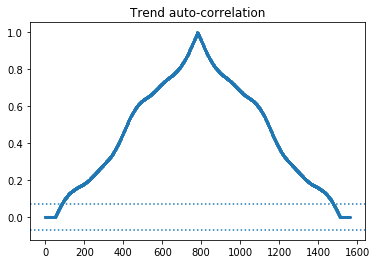

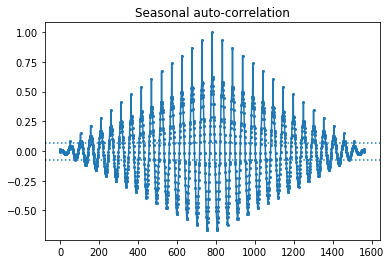

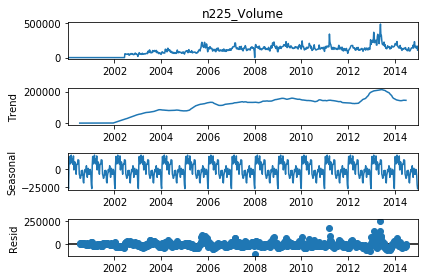

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


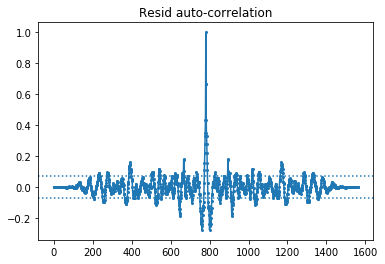

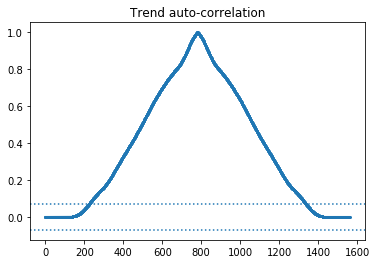

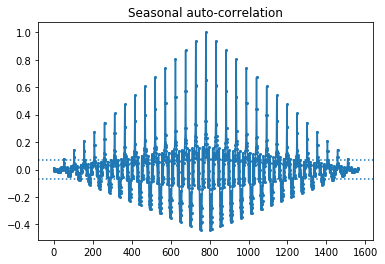

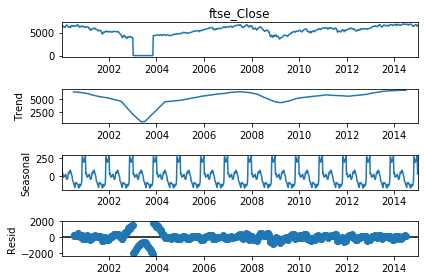

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


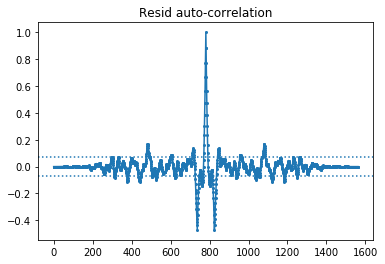

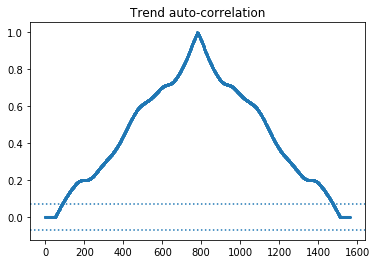

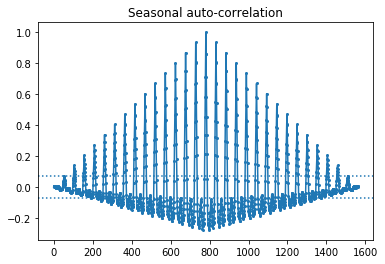

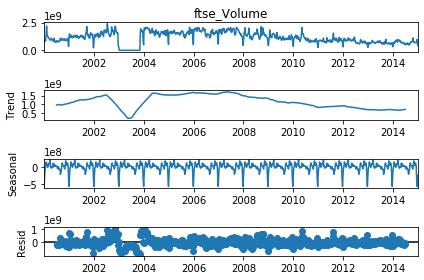

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


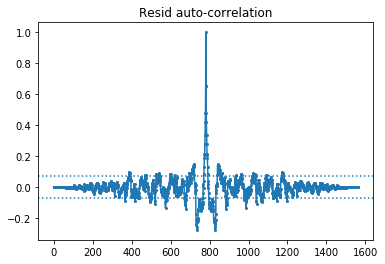

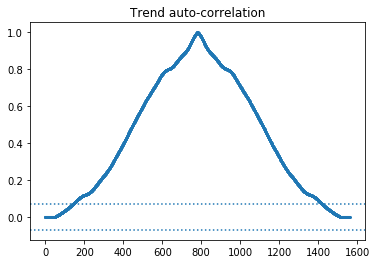

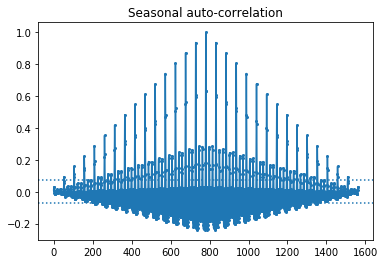

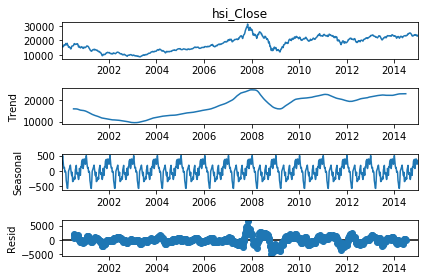

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


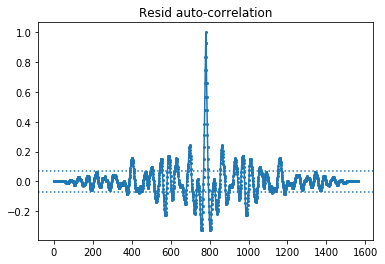

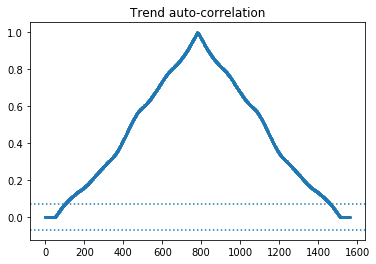

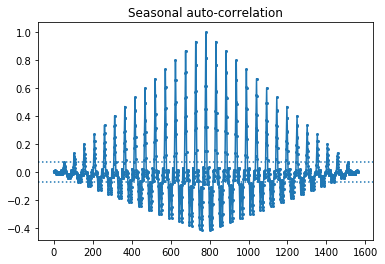

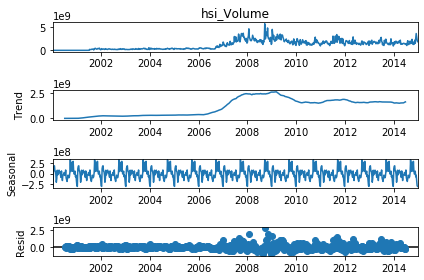

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


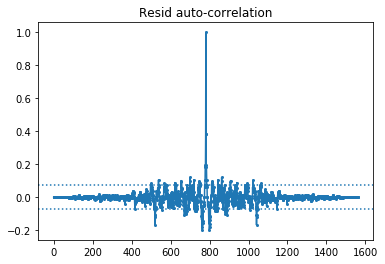

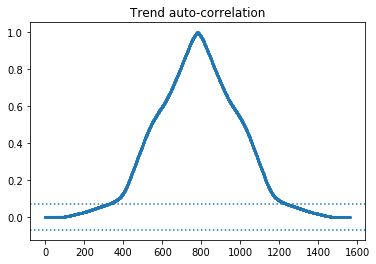

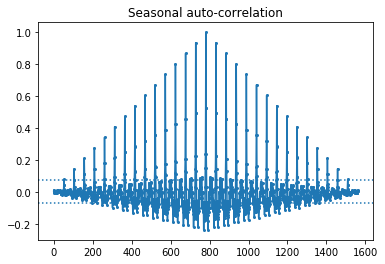

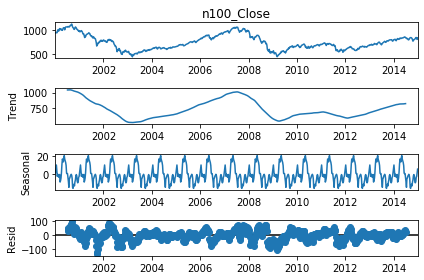

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


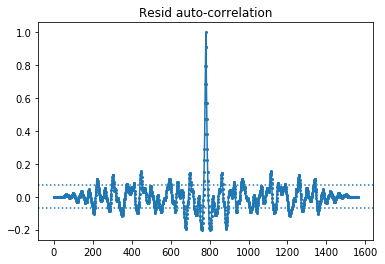

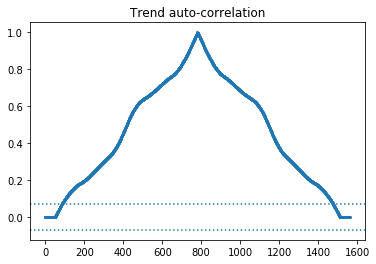

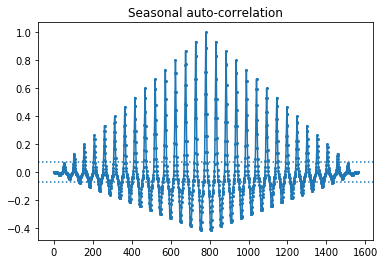

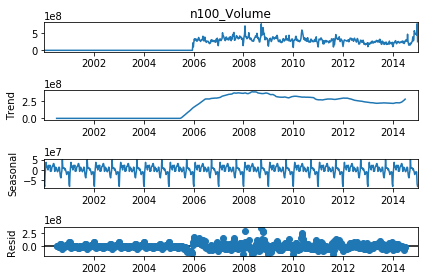

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


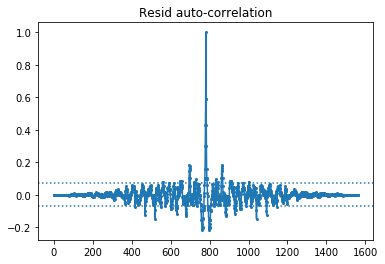

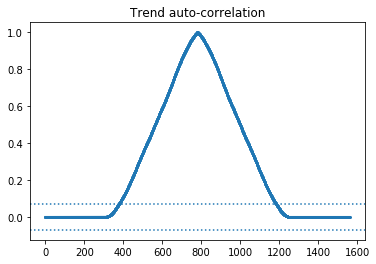

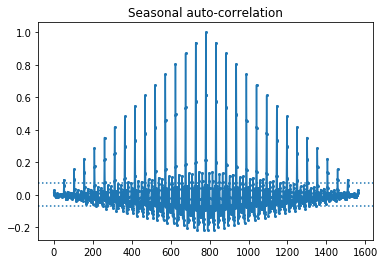

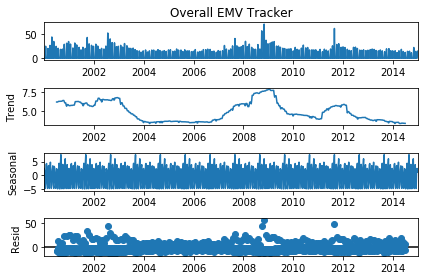

Resid is white noise?  False
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


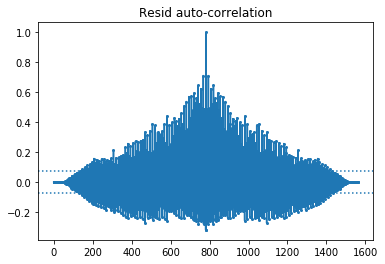

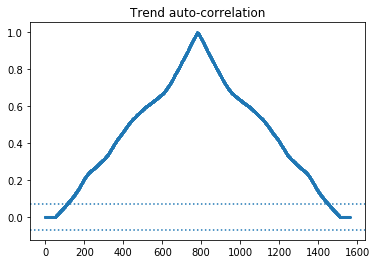

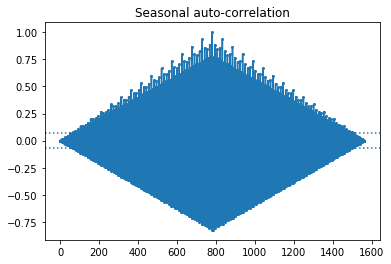

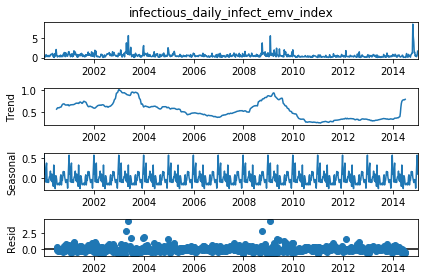

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


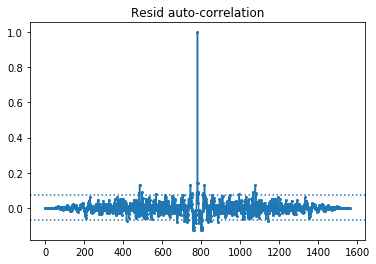

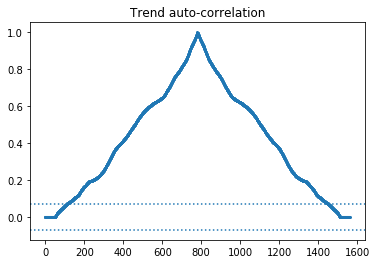

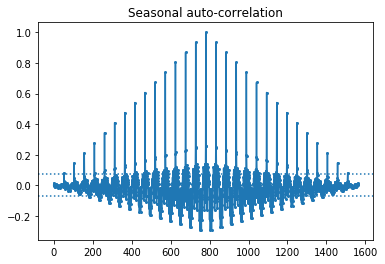

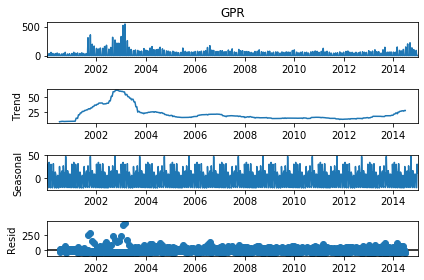

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


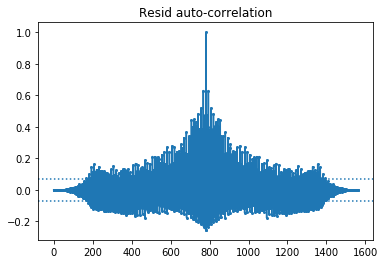

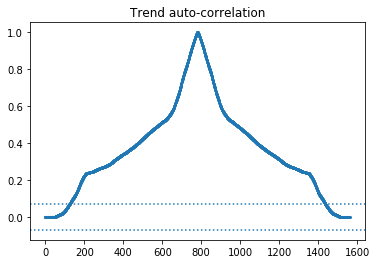

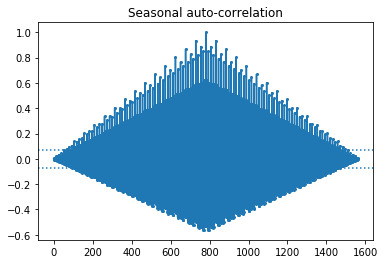

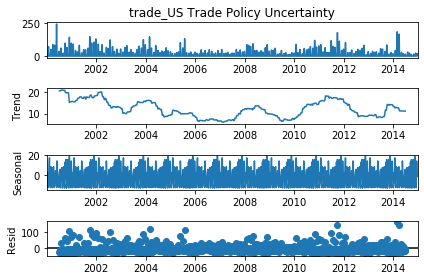

Resid is white noise?  False
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


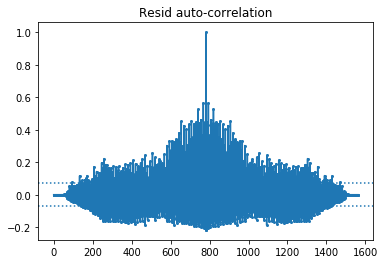

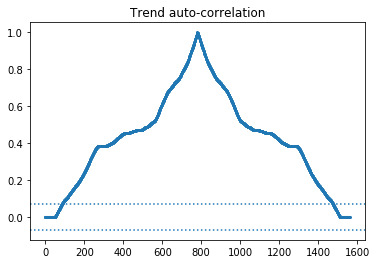

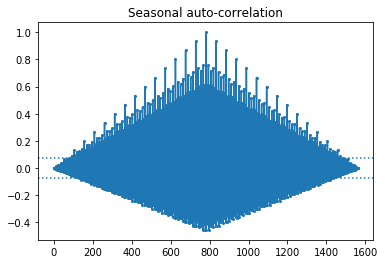

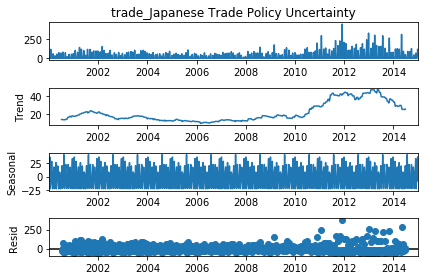

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


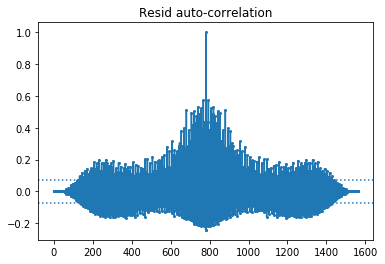

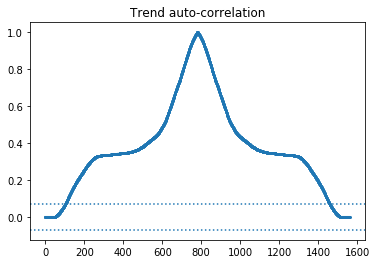

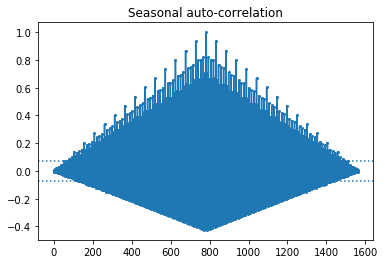

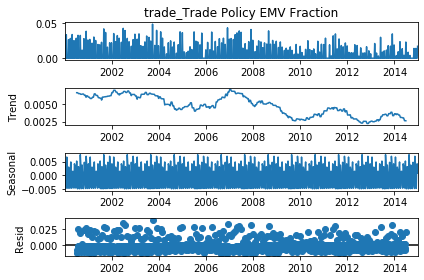

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


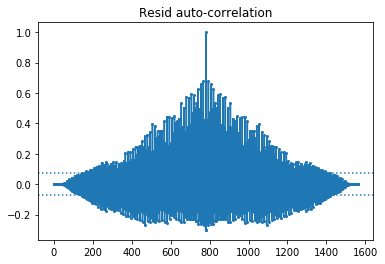

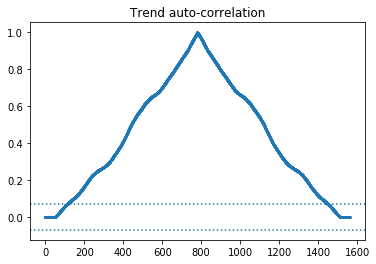

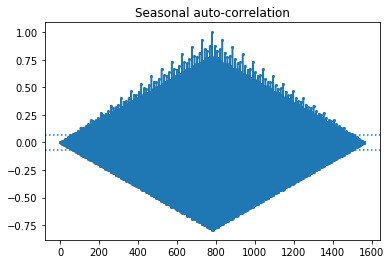

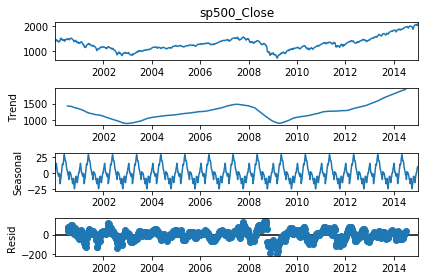

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


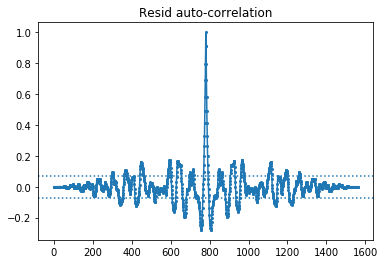

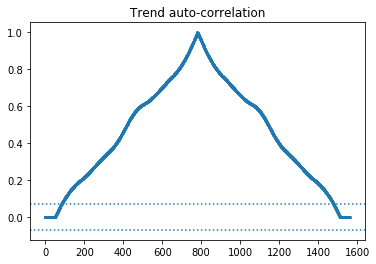

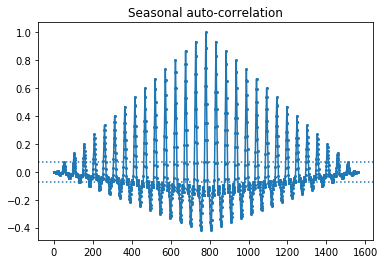

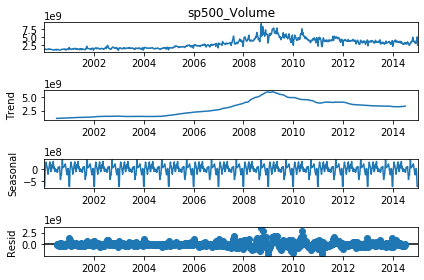

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


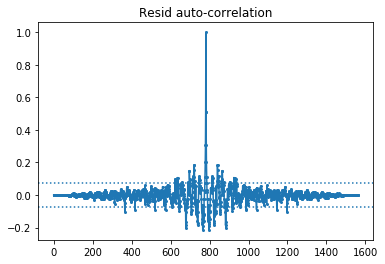

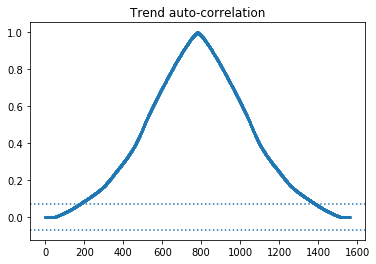

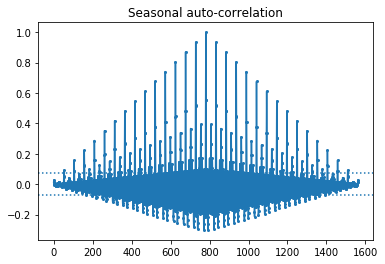

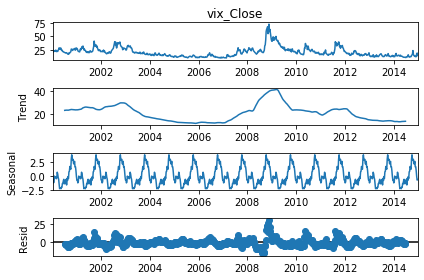

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


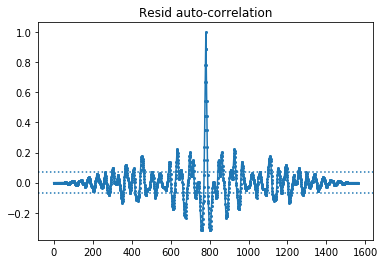

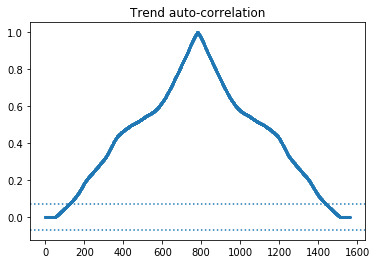

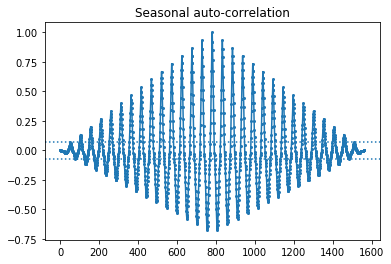

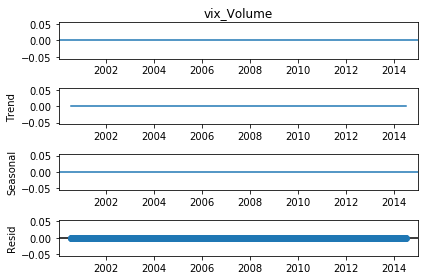

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


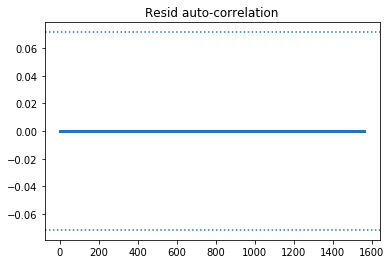

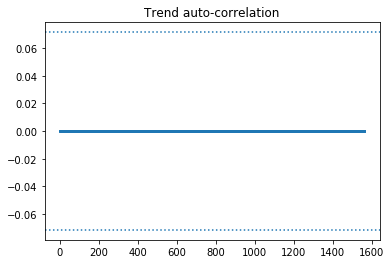

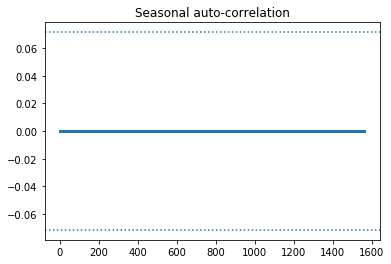

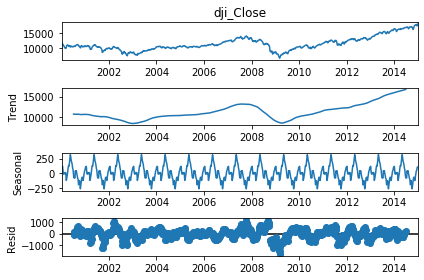

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


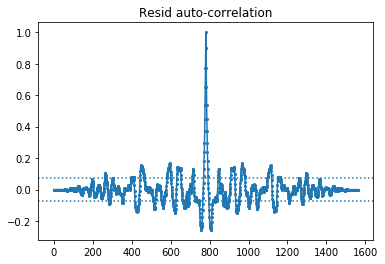

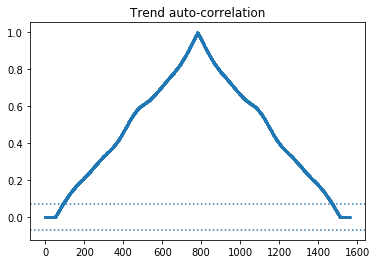

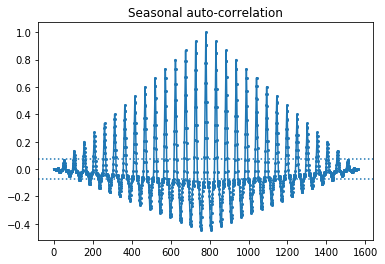

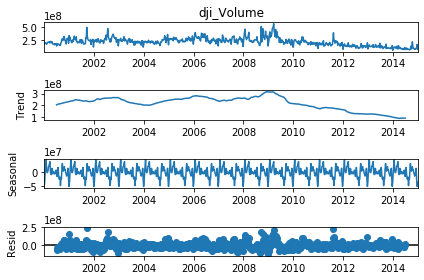

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


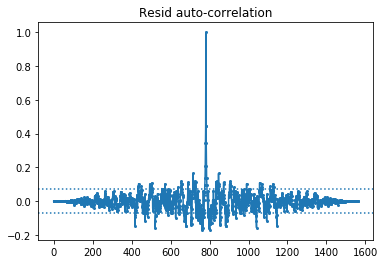

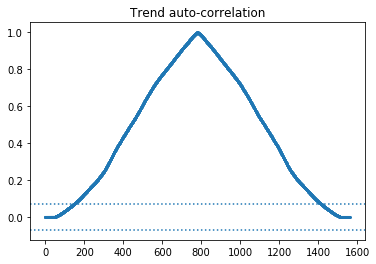

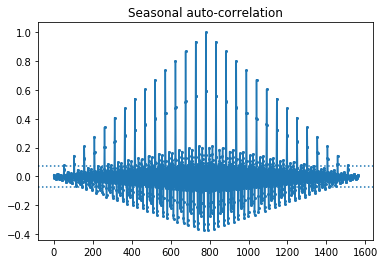

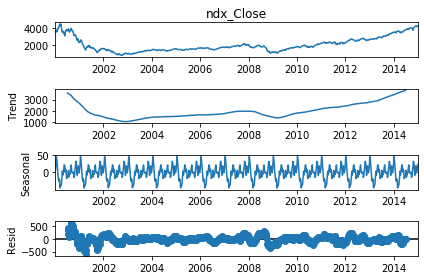

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


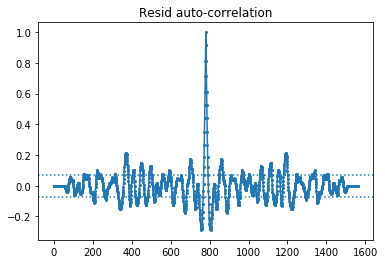

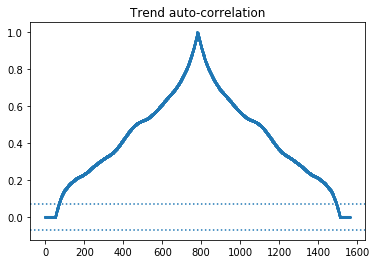

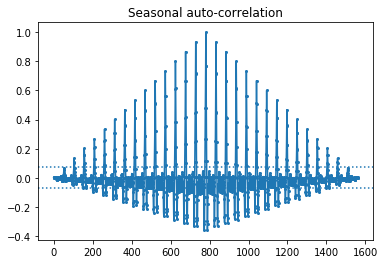

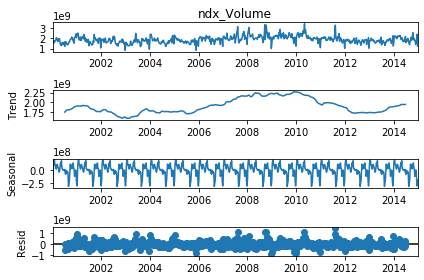

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


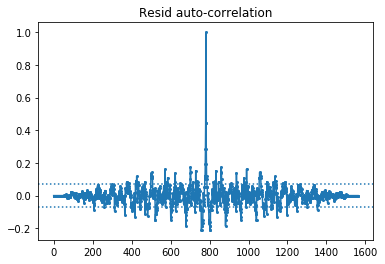

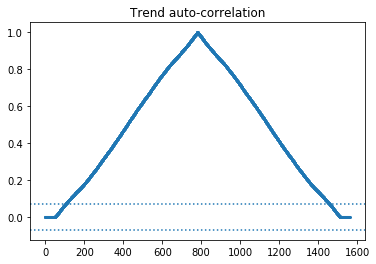

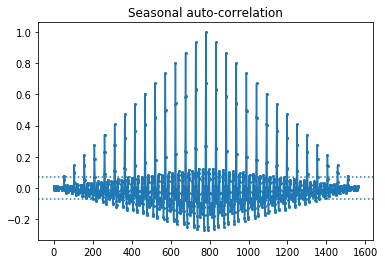

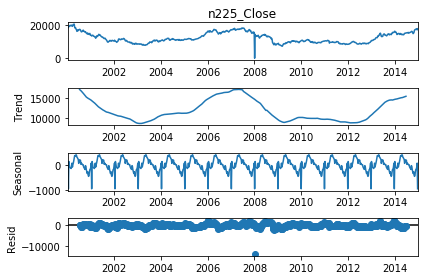

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


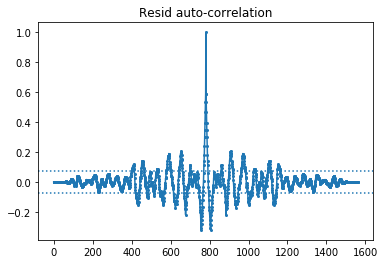

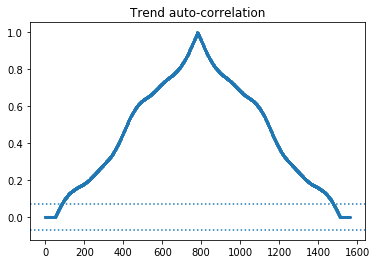

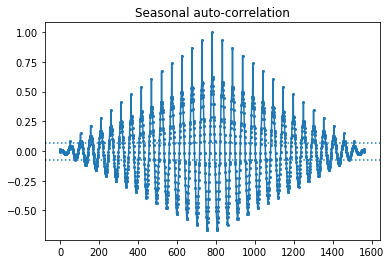

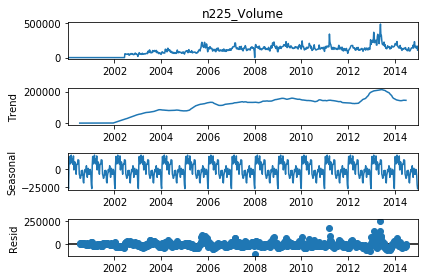

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


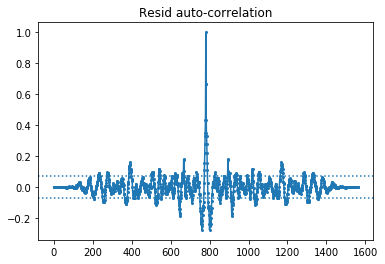

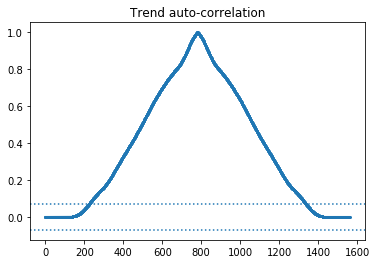

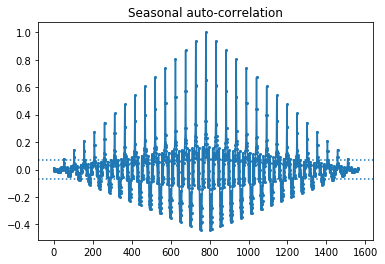

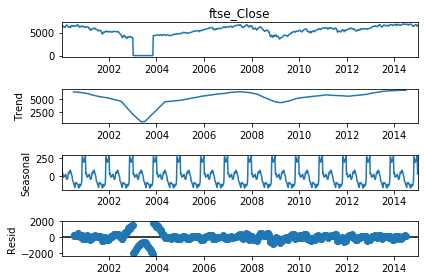

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


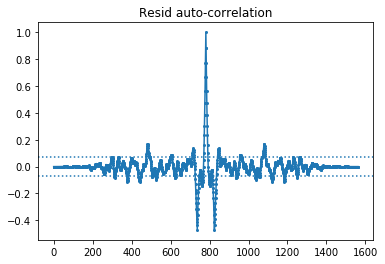

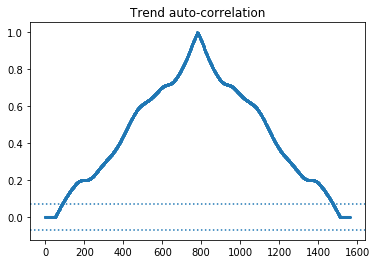

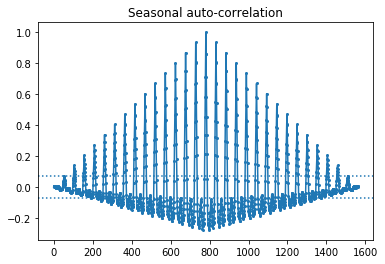

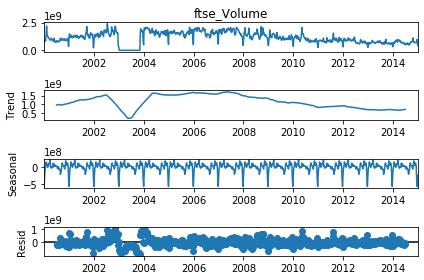

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


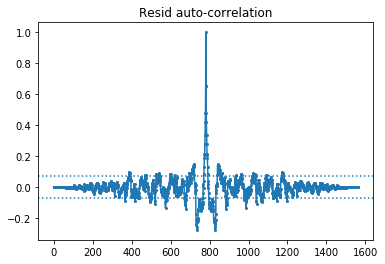

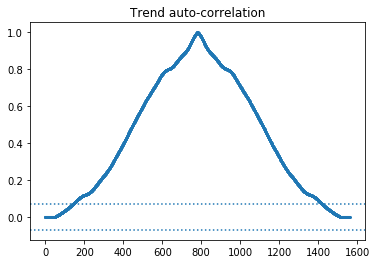

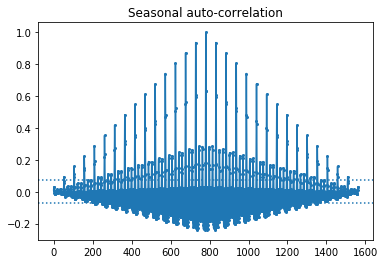

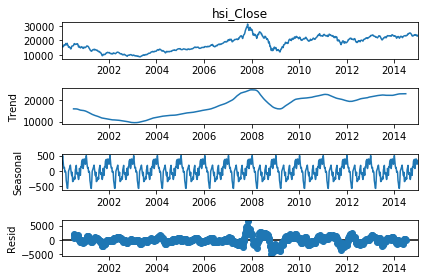

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


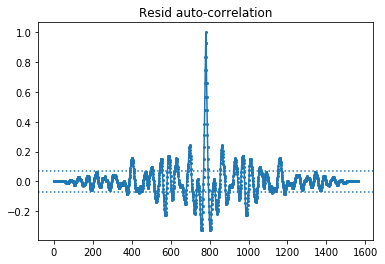

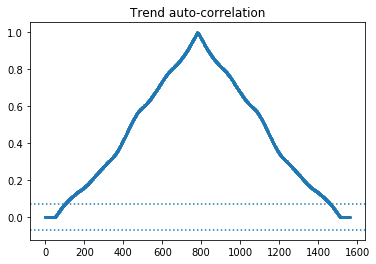

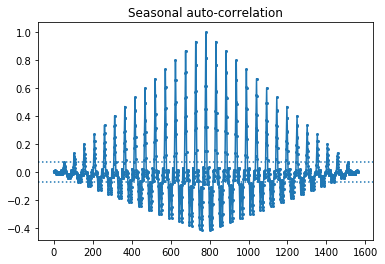

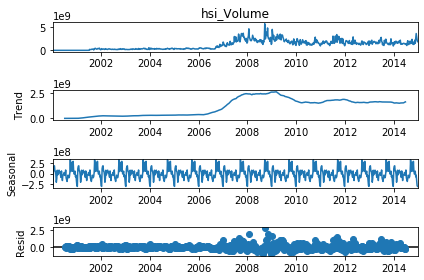

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


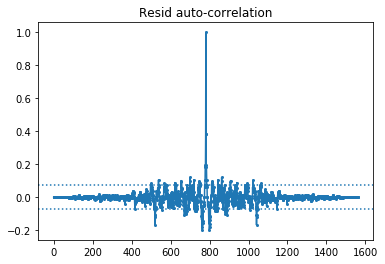

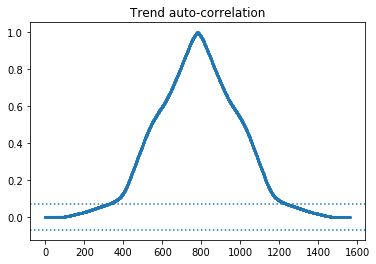

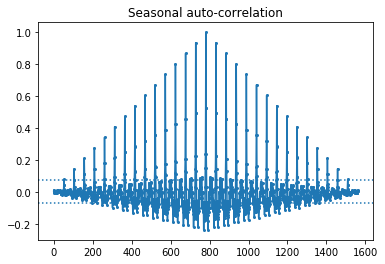

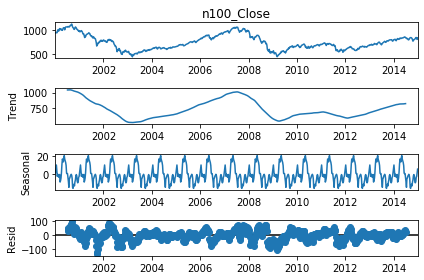

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


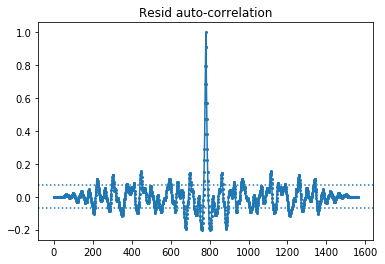

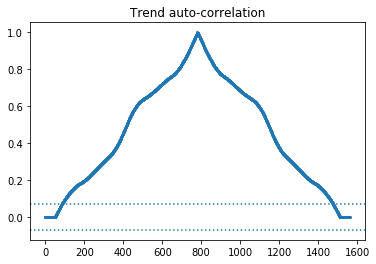

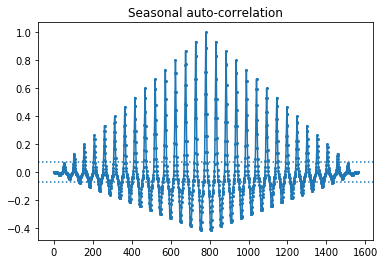

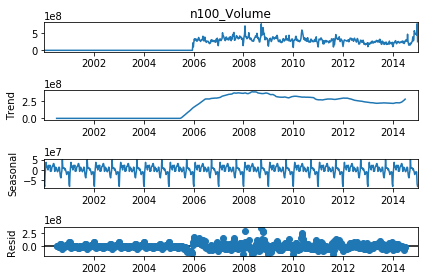

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


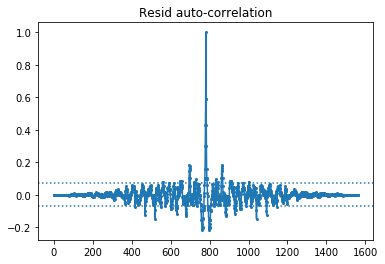

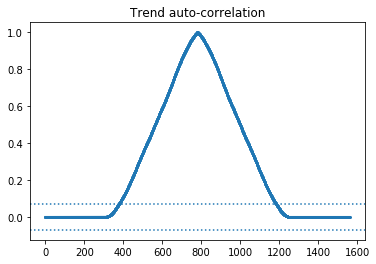

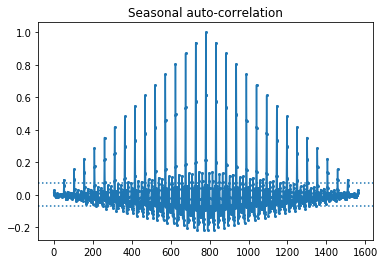

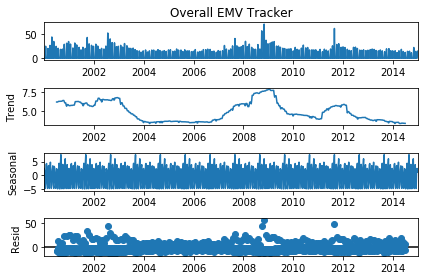

Resid is white noise?  False
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


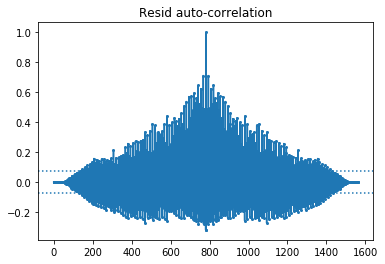

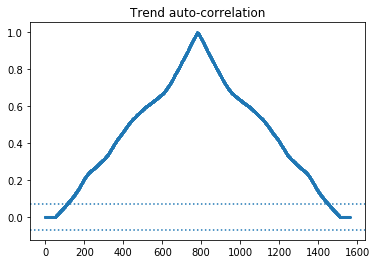

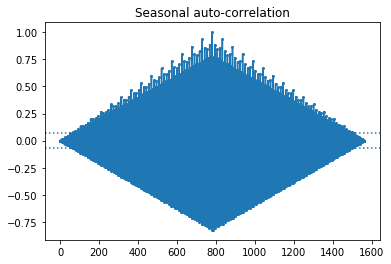

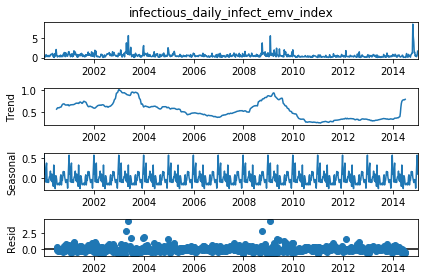

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


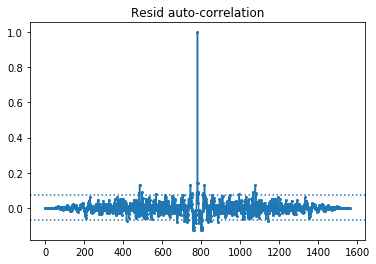

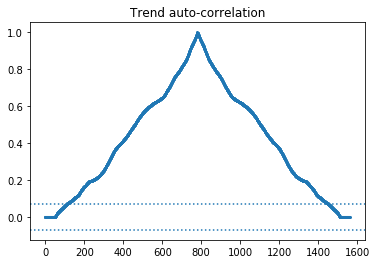

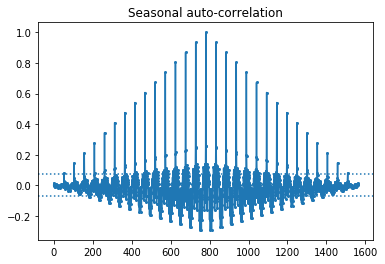

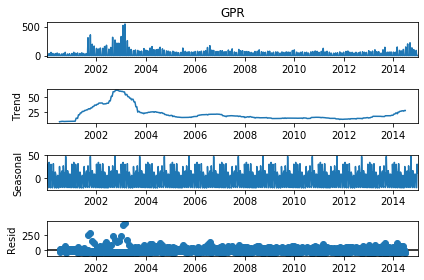

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


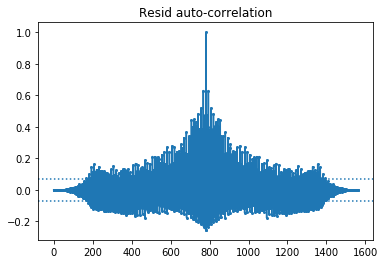

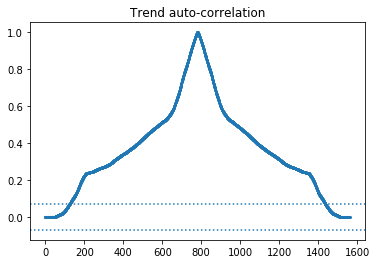

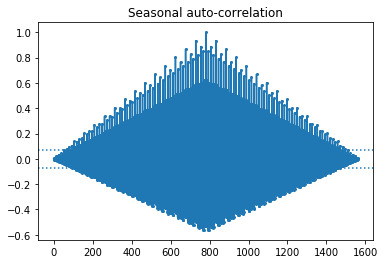

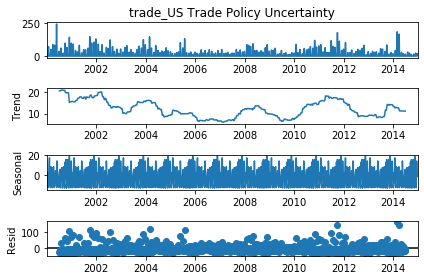

Resid is white noise?  False
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


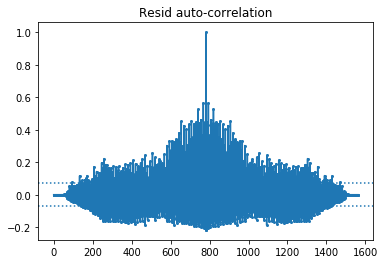

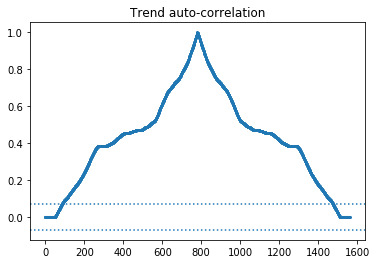

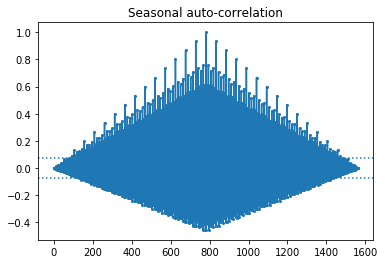

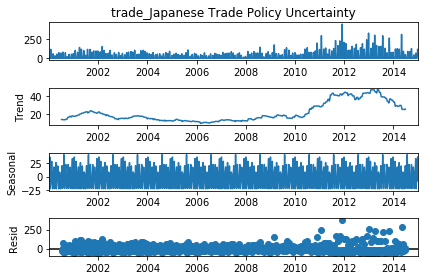

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


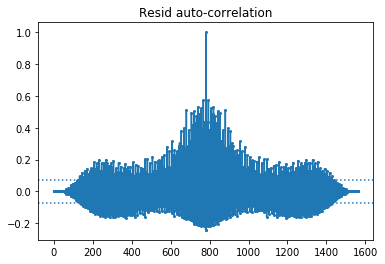

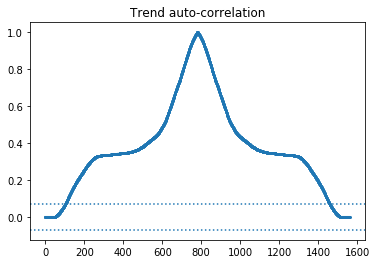

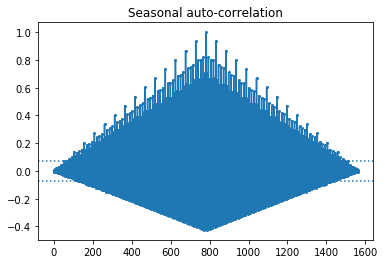

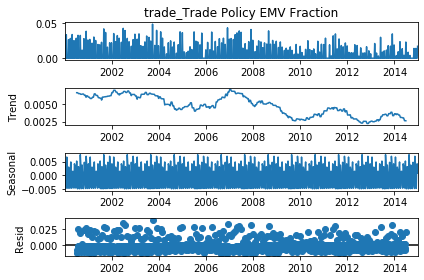

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


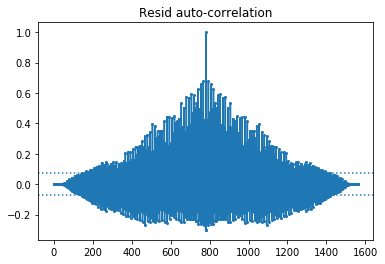

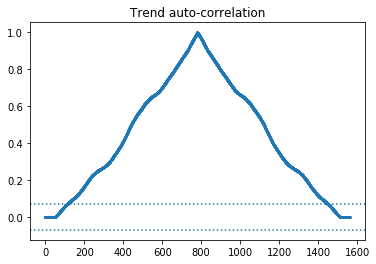

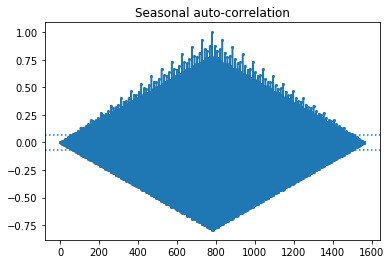

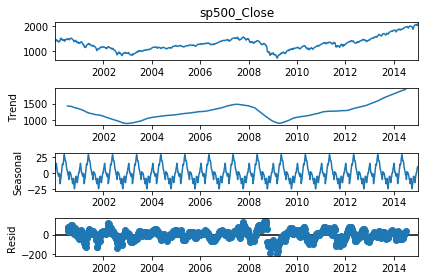

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


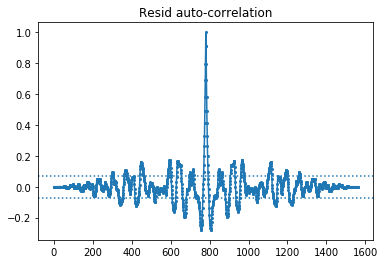

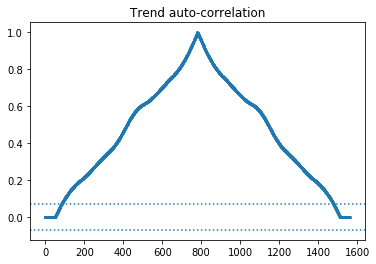

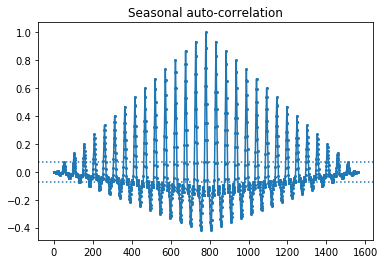

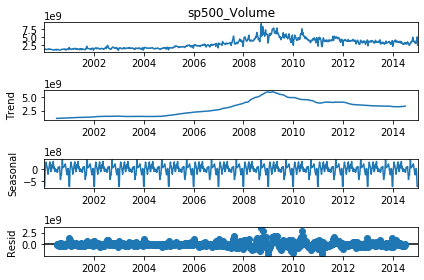

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


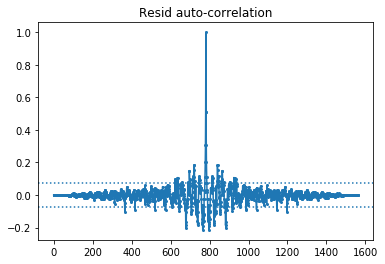

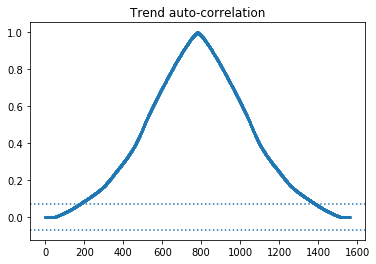

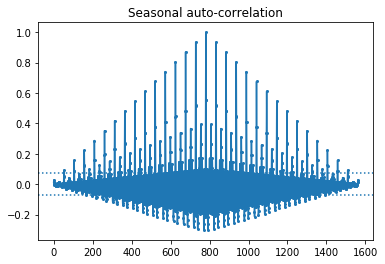

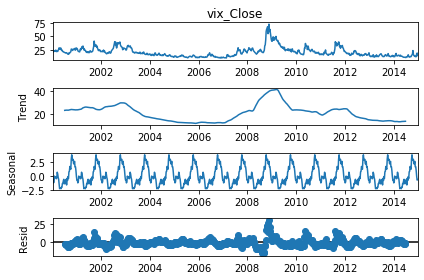

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


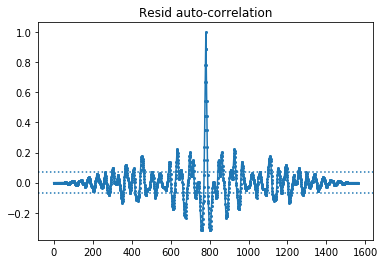

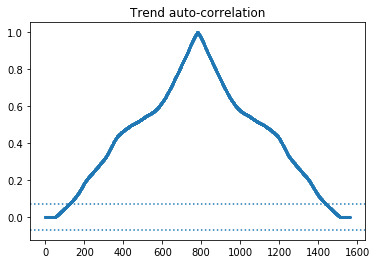

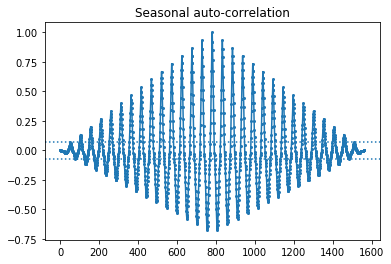

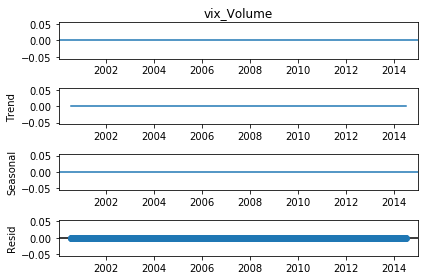

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


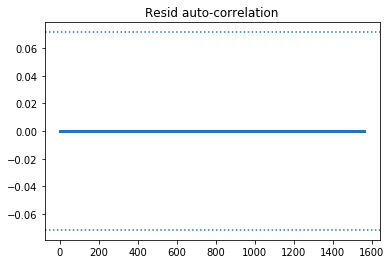

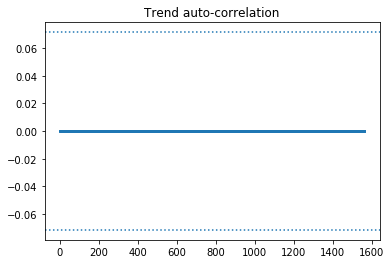

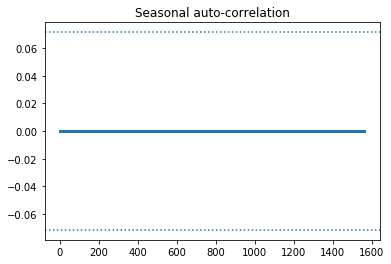

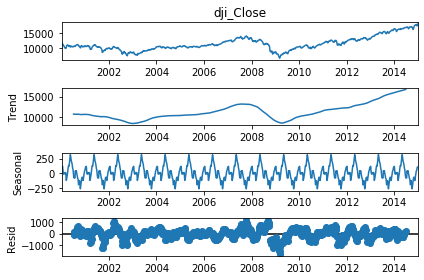

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


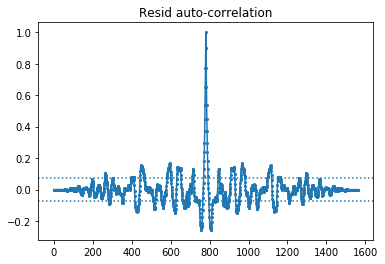

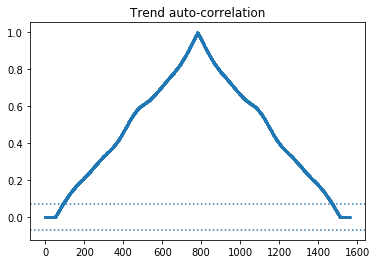

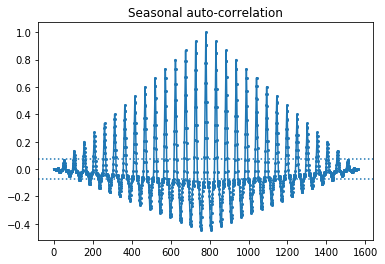

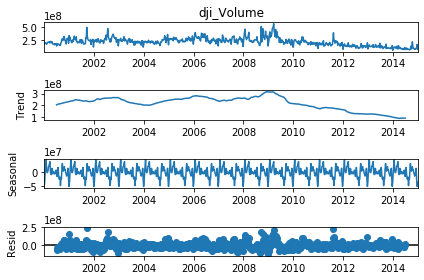

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


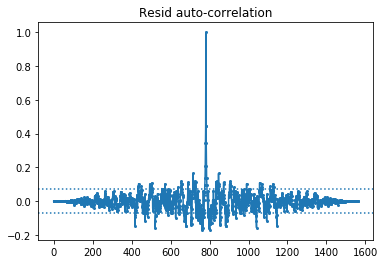

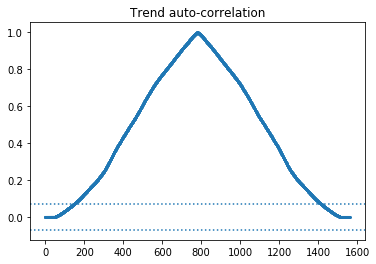

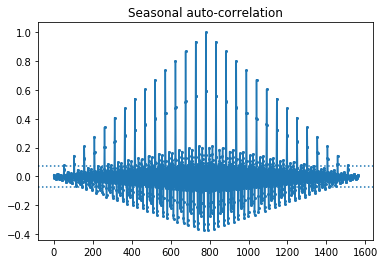

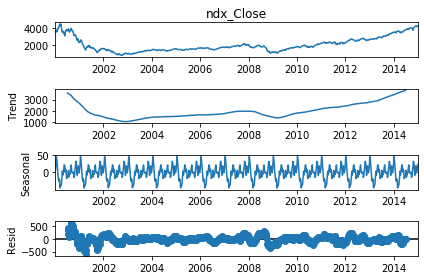

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


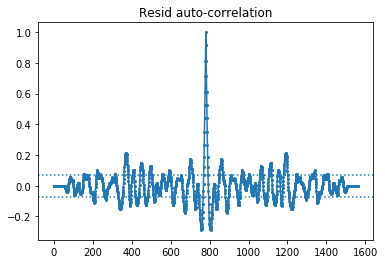

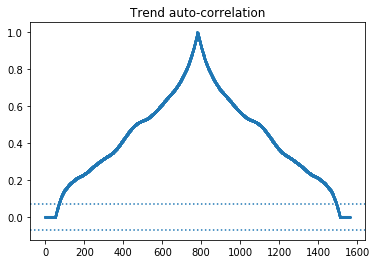

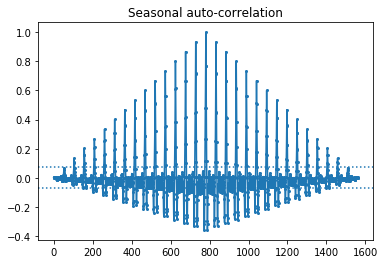

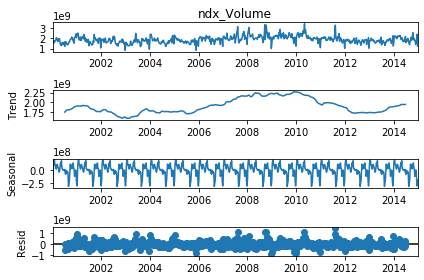

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


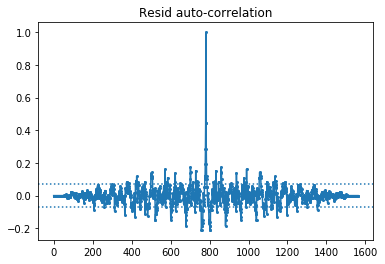

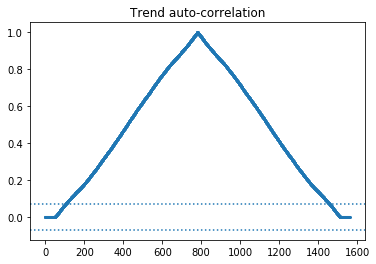

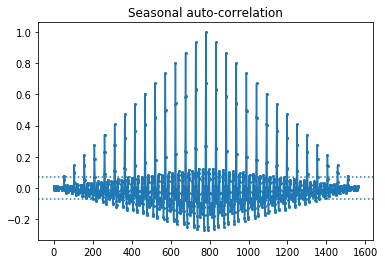

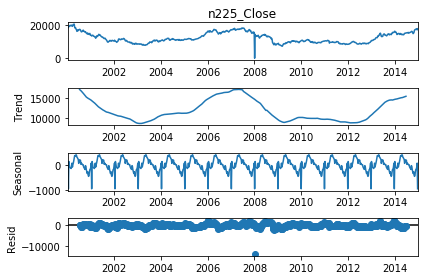

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


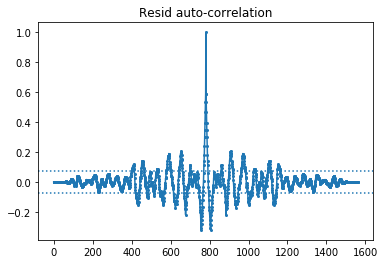

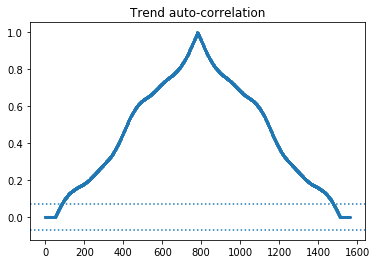

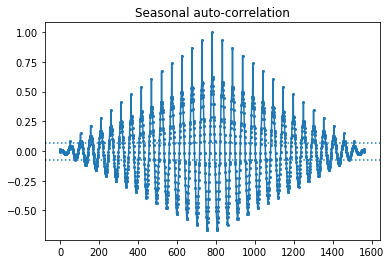

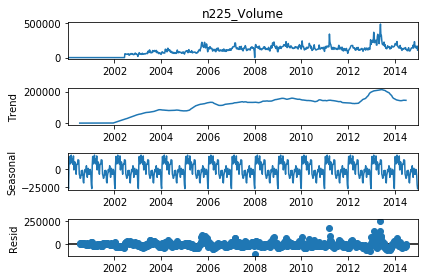

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


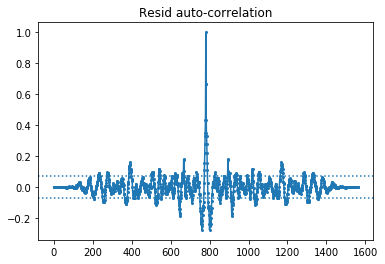

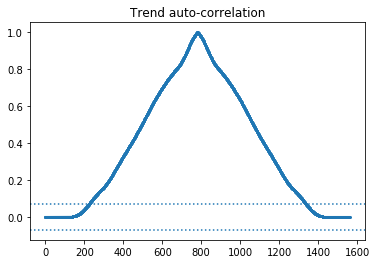

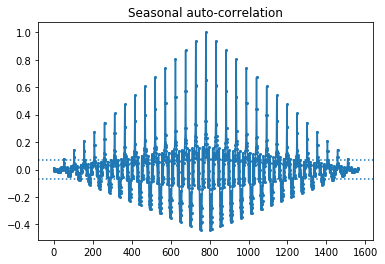

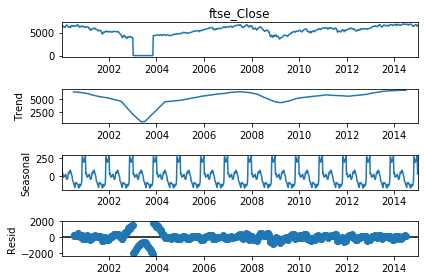

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


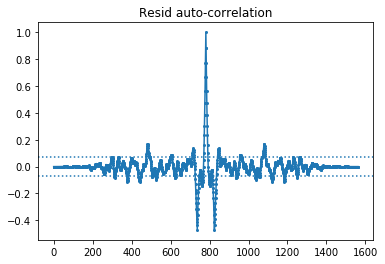

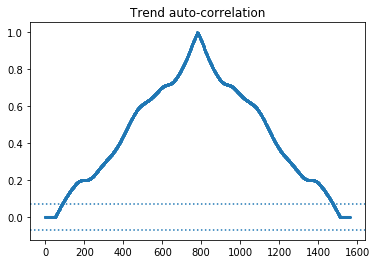

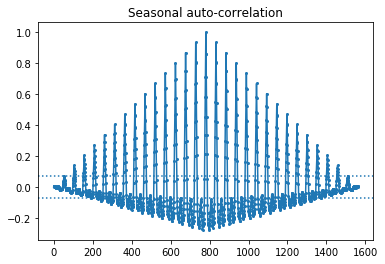

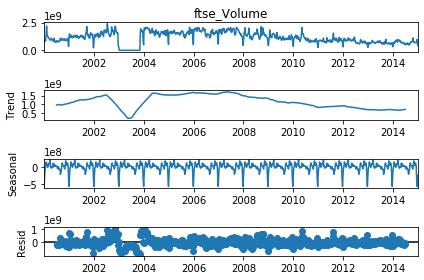

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  True
Resid is seasonal and trended noise?  True


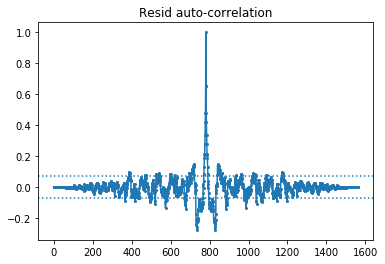

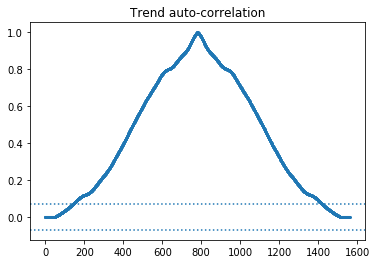

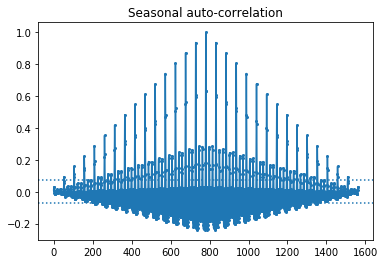

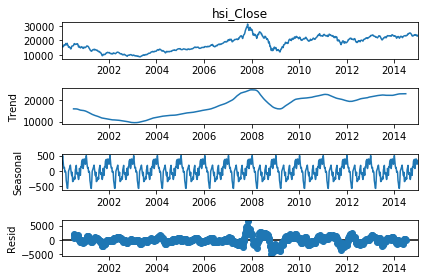

Resid is white noise?  False
Resid is seasonal noise?  True
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


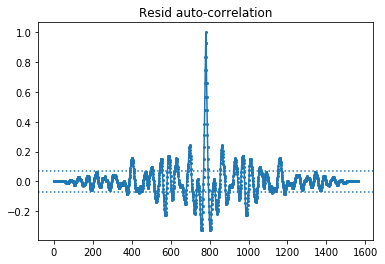

In [ ]:
for i in range(0,30):    
    for col in df_filled.columns:
        resid, trend, seasonal = decompose_and_plot(df_filled.loc[:,col], True)
        df_decomposed_resid[col] = resid
        df_decomposed_trend[col] = trend
        df_decomposed_seasonal[col] = seasonal
    for col in df_filled_test.columns:
        resid, trend, seasonal = decompose_and_plot(df_filled_test.loc[:,col])
        df_decomposed_resid_test[col] = resid
        df_decomposed_trend_test[col] = trend
        df_decomposed_seasonal_test[col] = seasonal

    df_final_resid = df_decomposed_resid.mask(df_nan == True, np.nan)
    df_final_trend = df_decomposed_trend.mask(df_nan == True, np.nan)
    df_final_seasonal = df_decomposed_seasonal.mask(df_nan == True, np.nan)

    df_final_resid_test = df_decomposed_resid_test.mask(df_nan_test == True, np.nan)
    df_final_trend_test = df_decomposed_trend_test.mask(df_nan_test == True, np.nan)
    df_final_seasonal_test = df_decomposed_seasonal_test.mask(df_nan_test == True, np.nan)

    df_white_noise_train, df_white_noise_test =  meanImputation.input(df_final_resid, df_final_resid_test)
    df_seasonal_train, df_seasonal_test = splineInterpolation.input(df_final_seasonal, df_final_seasonal_test)
    df_trended_train, df_trended_test = forwardFilling.input(df_final_trend, df_final_trend_test)

    df_final_train = df_white_noise_train + df_seasonal_train + df_trended_train
    df_final_test = df_white_noise_test + df_seasonal_test + df_trended_test

    df_train_weekly = generate_weekly(df_final_train, datetime(2000,1,7))
    df_test_weekly = generate_weekly(df_final_test, datetime(2015,1,2))

    df_train_weekly.to_csv(r'output\/CompleteIndexesWeeklyTrain_decomp_'+str(i)+'.csv', index = True)
    df_test_weekly.to_csv(r'output\/CompleteIndexesWeeklyTest_decomp_'+str(i)+'.csv', index = True)